In [116]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [86]:
train_set=pd.read_csv('train.csv')
test_set=pd.read_csv('test.csv')
gender_submission=pd.read_csv('gender_submission.csv')

In [87]:
train_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [88]:
test_set.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [89]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [90]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
train_set.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [92]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

0    549
1    342
Name: Survived, dtype: int64


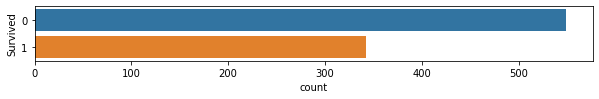

In [93]:
print(train_set.Survived.value_counts())
fig = plt.figure(figsize=(10,1))
sns.countplot(y='Survived', data=train_set)

3    491
1    216
2    184
Name: Pclass, dtype: int64


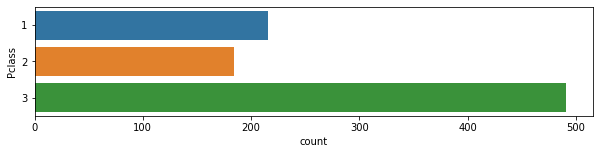

In [94]:
print(train_set.Pclass.value_counts())
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Pclass', data=train_set)

male      577
female    314
Name: Sex, dtype: int64


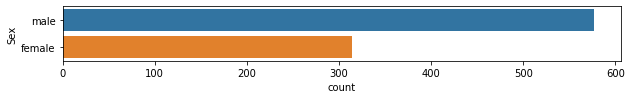

In [95]:
print(train_set.Sex.value_counts())
fig = plt.figure(figsize=(10,1))
sns.countplot(y='Sex', data=train_set)

In [96]:
train_set.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

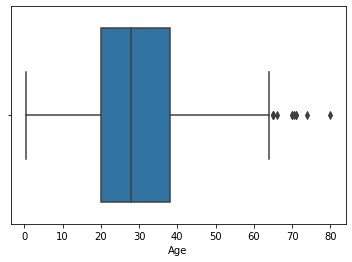

In [97]:
sns.boxplot(x=train_set['Age'])

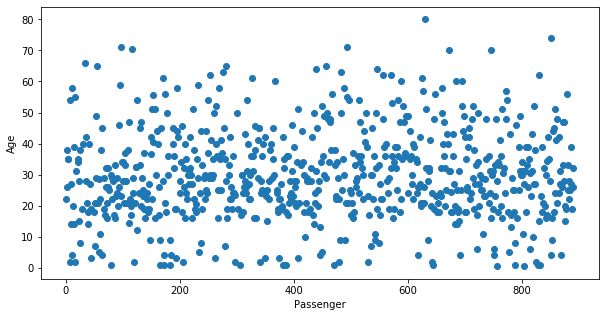

In [98]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(train_set['PassengerId'], train_set['Age'])
ax.set_xlabel('Passenger')
ax.set_ylabel('Age')
plt.show()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


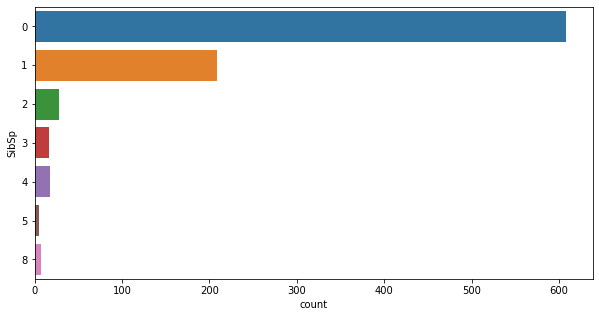

In [99]:
print(train_set.SibSp.value_counts())
fig = plt.figure(figsize=(10,5))
sns.countplot(y='SibSp', data=train_set)

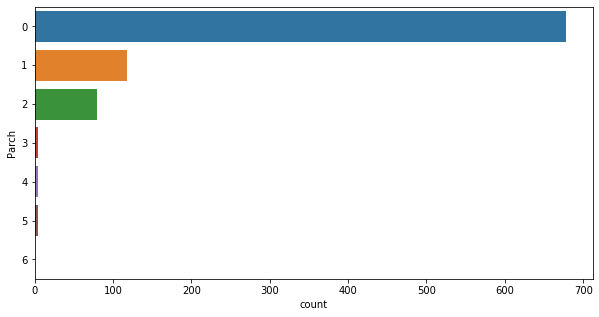

In [100]:
train_set.Parch.value_counts()
fig = plt.figure(figsize=(10,5))
sns.countplot(y='Parch', data=train_set)

In [101]:
len(train_set.Ticket.unique())

681

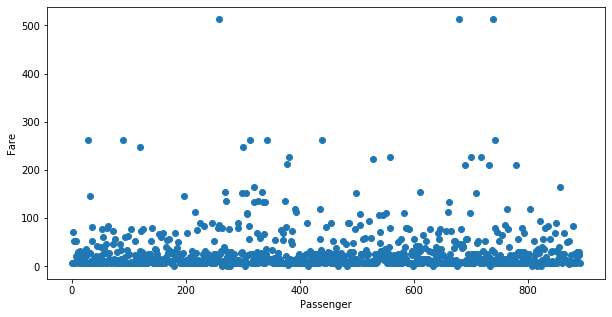

In [102]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(train_set['PassengerId'], train_set['Fare'])
ax.set_xlabel('Passenger')
ax.set_ylabel('Fare')
plt.show()

S    644
C    168
Q     77
Name: Embarked, dtype: int64


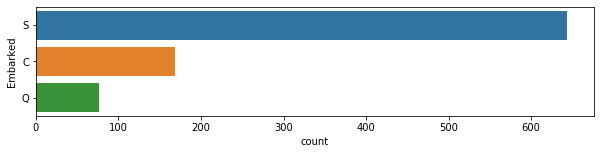

In [103]:
print(train_set.Embarked.value_counts())
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Embarked', data=train_set)

In [104]:
X_train_all=train_set.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
y_train_all=train_set['Survived']
X_test=test_set.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
X_train_all.shape

(891, 7)

In [106]:
train_w_otlr_age = train_set.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
train_w_otlr_age.drop(train_w_otlr_age[train_w_otlr_age['Age'] >= 64].index, inplace = True) 
train_w_otlr_age.shape

(878, 8)

In [108]:
train_w_otlr=X_train_w_otlr_age
train_w_otlr.drop(train_w_otlr[train_w_otlr['Fare'] >250].index, inplace = True)
train_w_otlr.shape

(870, 8)

In [111]:
X_train_w_otlr=train_w_otlr.drop(['Survived'],axis=1)
y_train_w_otlr=train_w_otlr['Survived']

In [114]:
X_train_w_otlr.shape

(870, 7)

In [115]:
y_train_w_otlr.shape

(870,)

In [117]:
s = (X_train_all.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Sex', 'Embarked']

In [121]:
t= (X_train_w_otlr.dtypes != 'object')
numerical_cols = list(t[t].index)
numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [127]:
X_train,X_val,y_train,y_val = train_test_split(X_train_w_otlr, y_train_w_otlr, random_state = 0,test_size=0.2)

In [122]:
numerical_transformer1 = SimpleImputer(strategy='constant')
numerical_transformer2 = SimpleImputer(strategy='median')
numerical_transformer3 = SimpleImputer(strategy='most_frequent')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer1, numerical_cols),
        ('cat', categorical_transformer, object_cols)
    ])
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer2, numerical_cols),
        ('cat', categorical_transformer, object_cols)
    ])
preprocessor3 = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer3, numerical_cols),
        ('cat', categorical_transformer, object_cols)
    ])

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
model1 = RandomForestClassifier(random_state = 1)
model2 = RandomForestClassifier(n_estimators=500,max_depth=9,random_state = 1)
model3 = RandomForestClassifier(n_estimators=500,criterion="entropy",max_depth=9,random_state = 1)

In [140]:
pipeline1a = Pipeline(steps=[('preprocessor', preprocessor1),
                              ('model', model1)
                             ])
pipeline1b = Pipeline(steps=[('preprocessor', preprocessor2),
                              ('model', model1)
                             ])
pipeline1c = Pipeline(steps=[('preprocessor', preprocessor3),
                              ('model', model1)
                             ])

In [128]:
pipeline1a.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='constant',
                                                                verbose=0),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
              

In [130]:
y_pred=pipeline1a.predict(X_val)

In [133]:
print(confusion_matrix(y_val,y_pred))
classification_report(y_val,y_pred)

[[87 18]
 [16 53]]


'              precision    recall  f1-score   support\n\n           0       0.84      0.83      0.84       105\n           1       0.75      0.77      0.76        69\n\n    accuracy                           0.80       174\n   macro avg       0.80      0.80      0.80       174\nweighted avg       0.81      0.80      0.81       174\n'

In [135]:
y_test=pipeline1a.predict(X_test)

In [137]:
ss1=pd.read_csv('gender_submission.csv')
ss1=ss1.drop('Survived',axis=1)
ss1['Survived']=y_test
ss1.to_csv('submission1.csv',index=False)

In [138]:
pipeline1b.fit(X_train, y_train)
y_pred=pipeline1a.predict(X_val)
print(confusion_matrix(y_val,y_pred))
classification_report(y_val,y_pred)

[[73 32]
 [12 57]]


'              precision    recall  f1-score   support\n\n           0       0.86      0.70      0.77       105\n           1       0.64      0.83      0.72        69\n\n    accuracy                           0.75       174\n   macro avg       0.75      0.76      0.74       174\nweighted avg       0.77      0.75      0.75       174\n'

In [141]:
pipeline1c.fit(X_train, y_train)
y_pred=pipeline1c.predict(X_val)
print(confusion_matrix(y_val,y_pred))
classification_report(y_val,y_pred)

[[86 19]
 [16 53]]


'              precision    recall  f1-score   support\n\n           0       0.84      0.82      0.83       105\n           1       0.74      0.77      0.75        69\n\n    accuracy                           0.80       174\n   macro avg       0.79      0.79      0.79       174\nweighted avg       0.80      0.80      0.80       174\n'

In [142]:
y_test2=pipeline1c.predict(X_test)

In [143]:
ss1=ss1.drop('Survived',axis=1)
ss1['Survived']=y_test2
ss1.to_csv('submission2.csv',index=False)

In [144]:
pipeline2a = Pipeline(steps=[('preprocessor', preprocessor1),
                              ('model', model2)
                             ])
pipeline2c = Pipeline(steps=[('preprocessor', preprocessor3),
                              ('model', model2)
                             ])

In [145]:
pipeline2a.fit(X_train, y_train)
y_pred=pipeline1a.predict(X_val)
print(confusion_matrix(y_val,y_pred))
classification_report(y_val,y_pred)

[[74 31]
 [14 55]]


'              precision    recall  f1-score   support\n\n           0       0.84      0.70      0.77       105\n           1       0.64      0.80      0.71        69\n\n    accuracy                           0.74       174\n   macro avg       0.74      0.75      0.74       174\nweighted avg       0.76      0.74      0.74       174\n'

In [146]:
pipeline2c.fit(X_train, y_train)
y_pred=pipeline1a.predict(X_val)
print(confusion_matrix(y_val,y_pred))
classification_report(y_val,y_pred)

[[74 31]
 [14 55]]


'              precision    recall  f1-score   support\n\n           0       0.84      0.70      0.77       105\n           1       0.64      0.80      0.71        69\n\n    accuracy                           0.74       174\n   macro avg       0.74      0.75      0.74       174\nweighted avg       0.76      0.74      0.74       174\n'

In [149]:
pipeline3a = Pipeline(steps=[('preprocessor', preprocessor1),
                              ('model', model3)
                             ])

In [150]:
pipeline3a.fit(X_train, y_train)
y_pred=pipeline1a.predict(X_val)
print(confusion_matrix(y_val,y_pred))
classification_report(y_val,y_pred)

[[74 31]
 [14 55]]


'              precision    recall  f1-score   support\n\n           0       0.84      0.70      0.77       105\n           1       0.64      0.80      0.71        69\n\n    accuracy                           0.74       174\n   macro avg       0.74      0.75      0.74       174\nweighted avg       0.76      0.74      0.74       174\n'

In [147]:
from sklearn.ensemble import RandomForestRegressor

In [151]:
model4 = RandomForestRegressor(n_estimators=500,max_depth=9,n_jobs=-1,random_state = 1)

In [155]:
pipeline4a = Pipeline(steps=[('preprocessor', preprocessor1),
                              ('model', model4)
                             ])

In [157]:
pipeline4a.fit(X_train, y_train)
val=pipeline1a.predict(X_val)

In [158]:
val = np.where(val > 0.5, 1, 0)

In [159]:
print(confusion_matrix(y_val,val))
classification_report(y_val,val)

[[74 31]
 [14 55]]


'              precision    recall  f1-score   support\n\n           0       0.84      0.70      0.77       105\n           1       0.64      0.80      0.71        69\n\n    accuracy                           0.74       174\n   macro avg       0.74      0.75      0.74       174\nweighted avg       0.76      0.74      0.74       174\n'

In [164]:
X_train_w_otlr_age=train_w_otlr_age.drop(['Survived'],axis=1)
y_train_w_otlr_age=train_w_otlr_age['Survived']

In [165]:
s = (X_train_w_otlr_age.dtypes == 'object')
object_cols2 = list(s[s].index)
object_cols2

['Sex', 'Embarked']

In [166]:
t= (X_train_w_otlr_age.dtypes != 'object')
numerical_cols2 = list(t[t].index)
numerical_cols2

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [167]:
X_train2,X_val2,y_train2,y_val2 = train_test_split(X_train_w_otlr_age, y_train_w_otlr_age, random_state = 0,test_size=0.2)

In [168]:
preprocessor_age = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer1, numerical_cols2),
        ('cat', categorical_transformer, object_cols2)
    ])

In [173]:
pipeline_age_1 = Pipeline(steps=[('preprocessor', preprocessor_age),
                              ('model', model1)
                             ])
pipeline_age_2 = Pipeline(steps=[('preprocessor', preprocessor_age),
                              ('model', model2)
                             ])

In [171]:
pipeline_age_1.fit(X_train2, y_train2)
y_pred=pipeline1a.predict(X_val2)
print(confusion_matrix(y_val2,y_pred))
classification_report(y_val2,y_pred)

[[90 16]
 [24 46]]


'              precision    recall  f1-score   support\n\n           0       0.79      0.85      0.82       106\n           1       0.74      0.66      0.70        70\n\n    accuracy                           0.77       176\n   macro avg       0.77      0.75      0.76       176\nweighted avg       0.77      0.77      0.77       176\n'

In [174]:
pipeline_age_2.fit(X_train2, y_train2)
y_pred=pipeline1a.predict(X_val2)
print(confusion_matrix(y_val2,y_pred))
classification_report(y_val2,y_pred)

[[90 16]
 [24 46]]


'              precision    recall  f1-score   support\n\n           0       0.79      0.85      0.82       106\n           1       0.74      0.66      0.70        70\n\n    accuracy                           0.77       176\n   macro avg       0.77      0.75      0.76       176\nweighted avg       0.77      0.77      0.77       176\n'